In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hopfieldtrain/train.jpg
/kaggle/input/hopfieldtest/test.jpg


In [2]:
import random
import re
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
from PIL import Image
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#read image and translate it to array
def readImage(file,size, threshold= 145):
    #file is jpg or jpeg pictures
    #size is a 1*2 vector,eg (40,40)
    pilIN = Image.open(file).convert(mode="L")
    pilIN= pilIN.resize(size)
    #pilIN.thumbnail(size,Image.ANTIALIAS)
    imgArray = np.asarray(pilIN,dtype=np.uint8)
    x = np.zeros(imgArray.shape,dtype=np.float)
    x[imgArray > threshold] = 1
    x[x==0] = -1
    return x

In [4]:
def arrayToImage(data, outFile = None):
    #data is 1 or -1 matrix
    y = np.zeros(data.shape,dtype=np.uint8)
    y[data==1] = 255
    y[data==-1] = 0
    img = Image.fromarray(y,mode="L")
    if outFile is not None:
        img.save(outFile)
    return img

In [5]:
#for convenience of calculations , we get a vector from the matrix
def matrixToVector(x):
    #x is a matrix
    m = x.shape[0]*x.shape[1]
    tmp1 = np.zeros(m)

    c = 0
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            tmp1[c] = x[i,j]
            c +=1
    return tmp1

In [6]:
#creating weights
def createWeights(x):
    # x is a vector
    if len(x.shape) != 1:
        print ("The input is not vector")
        return
    else:
        w = np.zeros([len(x),len(x)])
        for i in range(len(x)):
            for j in range(i,len(x)):
                #print(i, " ", j)
                if i == j:
                    w[i,j] = 0
                else:
                    w[i,j] = x[i]*x[j]
                    w[j,i] = w[i,j]
    #print(w)
    return w

In [7]:
#random updating of neurons
def updateAsynch(weight,vector,theta=0.5,times=100):
    energy_ = []
    times_ = []
    energy_.append(energy(weight,vector))
    times_.append(0)
    for i in range(times):
        length = len(vector)
        updateNum = random.randint(0,length-1)
        nextTimeValue = np.dot(weight[updateNum][:],vector) - theta
        if nextTimeValue>=0:
            vector[updateNum] = 1
        if nextTimeValue<0:
            vector[updateNum] = -1
        times_.append(i)
        energy_.append(energy(weight,vector))
    
    return (vector,times_,energy_)

In [8]:
#we calculate the energy of the system after each step
def energy(weight,x,bias=0):
#weight: m*m weight matrix
#x: 1*m data vector
#bias: outer field
    energy = -x.dot(weight).dot(x.T)+sum(bias*x)
    # E is a scalar
    return energy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == "__main__":


Text(0.5, 1.0, 'train picture1')

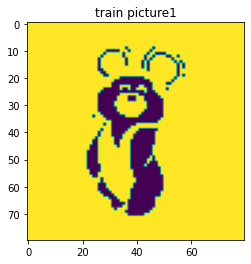

weight matrix is prepared!!!!!


In [9]:
#import training picture
size_global =(80,80)
threshold_global = 60

trainPath = "/kaggle/input/hopfieldtrain/train.jpg"
flag = 1

matrixTrain = readImage(trainPath,size = size_global,threshold=threshold_global)
vectorTrain = matrixToVector(matrixTrain)
plt.imshow(arrayToImage(matrixTrain))
plt.title("train picture"+str(flag))
plt.show()

w_ = createWeights(vectorTrain)
w_ = w_/flag
print("weight matrix is prepared!!!!!")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == "__main__":


<AxesSubplot:>

Text(0.5, 1.0, 'test picture1')

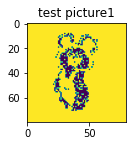

In [10]:
# import test data
testPath = "/kaggle/input/hopfieldtest/test.jpg"
num = 1

#num = num+1
matrixTest = readImage(testPath,size = size_global,threshold=threshold_global)
vectorTest = matrixToVector(matrixTest)
plt.subplot(221)
plt.imshow(arrayToImage(matrixTest))
plt.title("test picture"+str(num))

<AxesSubplot:>

Text(0.5, 1.0, 'recall1')

<AxesSubplot:>

Text(0, 0.5, 'energy')

Text(0.5, 0, 'update times')

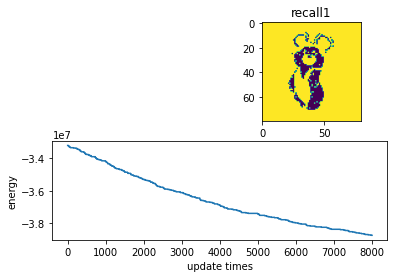

In [11]:
#result
#print(matrixTest)
oshape = matrixTest.shape
aa = updateAsynch(weight=w_,vector=vectorTest,theta = 0.5 ,times=8000)
vectorTestUpdate = aa[0]
matrixTestUpdate = vectorTestUpdate.reshape(oshape)
#matrixTestUpdate.shape
#print(matrixTestUpdate)
plt.subplot(222)
plt.imshow(arrayToImage(matrixTestUpdate))
plt.title("recall"+str(num))

#plt.show()
plt.subplot(212)
plt.plot(aa[1],aa[2])
plt.ylabel("energy")
plt.xlabel("update times")
    
plt.show()
